$\DeclareMathOperator{\li}{li}$

# Fibonacci numbers

The Fibonacci sequence is defined by the iterative formula

$$x_{n+2} = x_n + x_{n+1}.$$

Here's a simple function to compute these numbers.

In [54]:
def fibonacci(n):
    x = [1, 1]
    while len(x) < n + 1:
        x.append(x[-2] + x[-1])
    return x[-1]

In [55]:
fibonacci(4)

5

In [56]:
fibonacci(10)

89

In [57]:
fibonacci(80)

37889062373143906

In [58]:
def fibonacci_sequence(n):
    x = [1, 1]
    while len(x) < n+1:
        x.append(x[-2] + x[-1])
    return x

In [59]:
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 16, 'axes.linewidth' : 2, 'lines.linewidth' : 3, 'axes.labelsize' : 25})
import matplotlib.pyplot as plt
import numpy as np

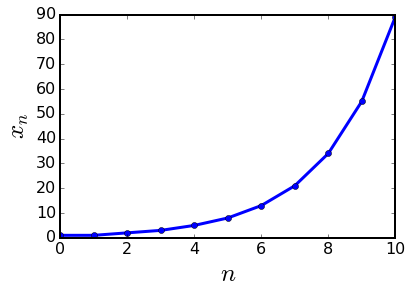

In [60]:
def plot_fibonacci(n):
    plt.plot(fibonacci_sequence(n),'o-');
    plt.xlabel('$n$')
    plt.ylabel('$x_n$');
    
plot_fibonacci(10)

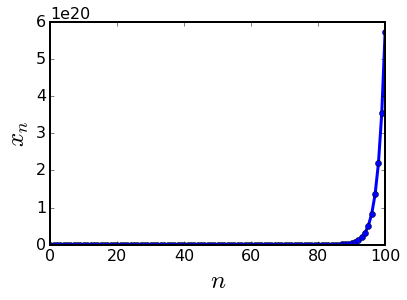

In [61]:
plot_fibonacci(100)

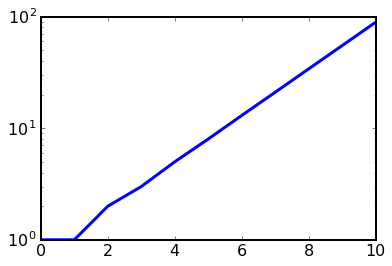

In [69]:
plt.semilogy(fibonacci_sequence(10));

In [63]:
from math import sqrt
from __future__ import division
alpha_plus = 1/2 + sqrt(5)/2
alpha_minus = 1/2 - sqrt(5)/2
c_2 = (alpha_plus-1)/(alpha_plus-alpha_minus)
c_1 = 1 - c_2

In [64]:
def fib(n):
    return c_1*alpha_plus**n + c_2*alpha_minus**n

In [68]:
print fib(80)

3.78890623731e+16


# Prime numbers

Prime numbers are the integers that divide evenly only by themselves and one.  Every number has a uniqe factorization as a product of primes.

In [70]:
def sieve(numbers, prime):
    sieved_numbers = []
    for number in numbers:
        if (number == prime) or (number % prime != 0):
            sieved_numbers.append(number)
    return sieved_numbers

In [71]:
range(2,11)

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [72]:
x = range(2,11)
print x
print sieve(x,2)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[2, 3, 5, 7, 9]


In [78]:
from math import sqrt
def compute_primes(n):
    integers = range(1,n+1)
    primes = integers[1:]
    i = 2
    while i <= sqrt(n):
        primes = sieve(primes,i)
        i += 1
    return np.array(primes)

In [79]:
print compute_primes(9)

[2 3 5 7]


In [80]:
print compute_primes(100)

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97]


## How many primes are there?

### How are they distributed?
Can we find a formula for $p_n$?

In [81]:
n = 100
primes = compute_primes(n)
np.count_nonzero(primes<10)

4

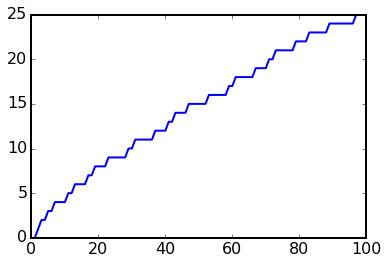

In [82]:
primes_up_to_n = [np.count_nonzero(primes<=i) for i in xrange(1,n+1)]

plt.plot(range(1,n+1),primes_up_to_n,lw=2);

(introduce $\pi(n)$)

In [83]:
def pi(n):
    """Note that this actually returns a vector of values pi(x) for all x <= n."""
    primes = compute_primes(n)
    return [np.count_nonzero(primes<=i) for i in xrange(1,n+1)]

In [84]:
def plot_pi(n):
    pi_values = pi(n)
    plt.plot(range(1,n+1),pi_values,lw=3)
    plt.xlabel('$n$')
    plt.ylabel('$\pi(n)$')

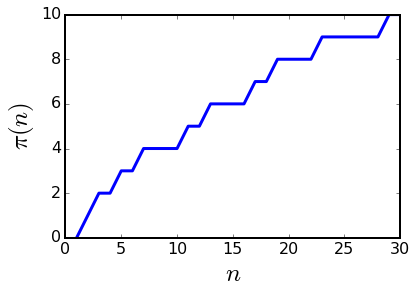

In [85]:
plot_pi(30)

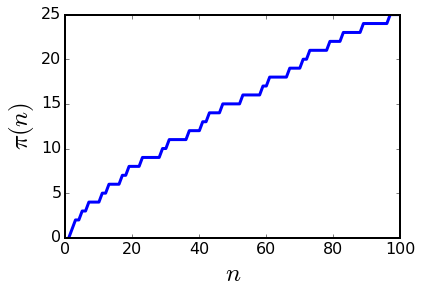

In [86]:
plot_pi(100)

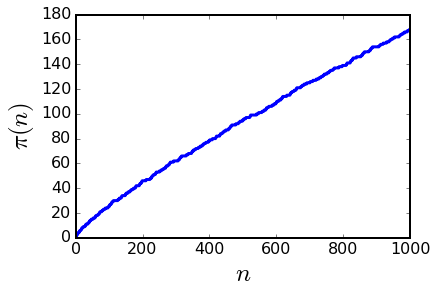

In [87]:
plot_pi(1000)

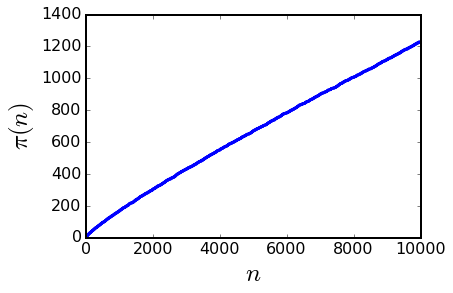

In [88]:
plot_pi(10000)

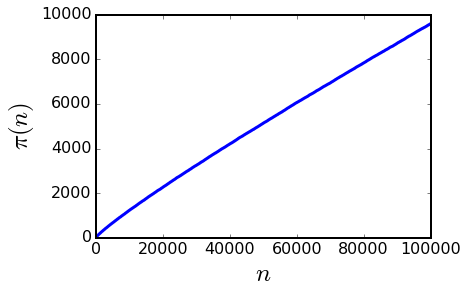

In [89]:
plot_pi(100000)

How likely is a random number to be prime?

Clearly it depends on approximately how large the number is.  Let's look at the fraction of all numbers up to $n$ that are prime.

In [90]:
def plot_proportion_of_primes(n):
    proportion = pi(n)/np.arange(1.,n+1)  # Note the decimal point!
    plt.plot(range(1,n+1),proportion,lw=3)
    plt.ylabel('Prime fraction')
    plt.xlabel('$n$')

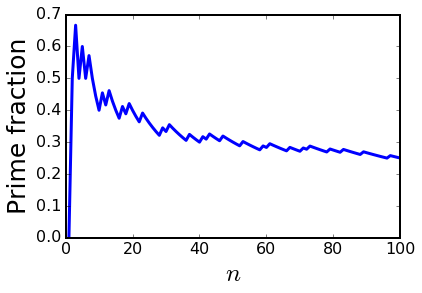

In [91]:
plot_proportion_of_primes(100)

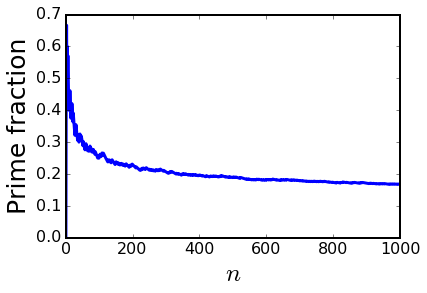

In [92]:
plot_proportion_of_primes(1000)

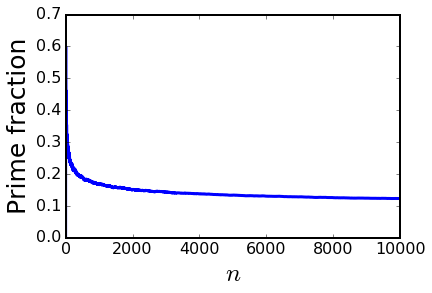

In [93]:
plot_proportion_of_primes(10000)

Gauss noticed that the "probability" of a number being prime seems related to the number of digits it has:

In [ ]:
def proportion_in_interval(lower,upper):
    primes = compute_primes(upper)
    primes = primes[np.where(primes>=lower)]
    return len(primes)/float(upper-lower)

In [ ]:
print "1 digit:  ", proportion_in_interval(1,10)
print "2 digits: ", proportion_in_interval(10,100)
print "3 digits: ", proportion_in_interval(100,1000)
print "4 digits: ", proportion_in_interval(1000,10000)

In [ ]:
for i in range(1,5):
    print 1./(2.*i)

Based on this, we might conjecture that

$$\pi(n) \approx \int_2^n \frac{1}{\log(x)} dx$$

where $\approx$ means "approximately equals".  The integral here is a special function known (appropriately) as the *logarithmic integral* and denoted $\li(n)$.  Python's sympy library has a built-in function to evaluate it.

In [94]:
from sympy.mpmath import li
print li(5)

3.63458831003265


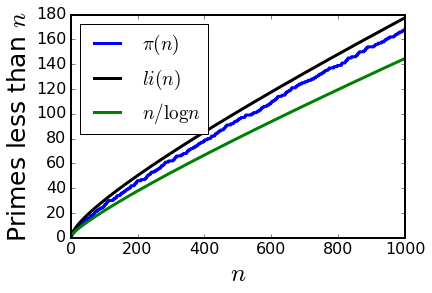

In [95]:
n = 1000
plot_pi(n)
plt.hold(True)
x = np.arange(1,n)

plt.plot(x,[li(X) for X in x],'-k')
plt.plot(x,x/np.log(x))
plt.ylabel('Primes less than $n$')
plt.xlabel('$n$');
plt.legend(('$\pi(n)$','$li(n)$','$n/\log n$'),loc='best');

### The Prime Number Theorem

Our conjecture above turns out to be correct in the asymptotic sense:

$$\lim_{n\to \infty} \frac{\pi(n)}{\li(n)} = 1$$

and

$$\lim_{n\to \infty} \frac{\pi(n)}{n/\log(n)} = 1.$$

In other words: $p_n \approx n \log(n)$.  The relative error in this approximation goes to zero as $n \to \infty$.

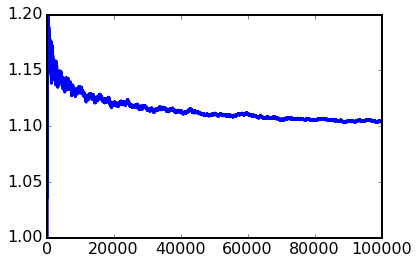

In [96]:
n = 100000
ints = np.arange(1.,n+1)
plt.plot(ints,pi(n)/(ints/np.log(ints)))
plt.ylim(1.,1.2);

The sequence seems to converge very slowly!

## A formula for $p_n$?

The Prime Number Theorem implies that 

$$p_n \approx n \log n$$

(why?)

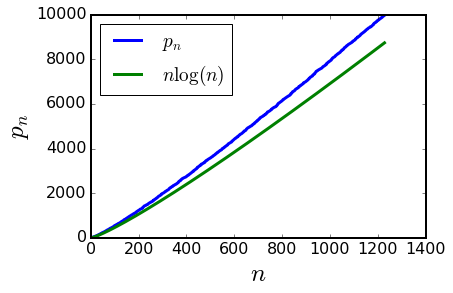

In [97]:
n = 10000
primes = compute_primes(n)
plt.plot(primes)
plt.hold(True)
y = len(primes)
z = np.arange(y)
plt.plot(z*np.log(z));
plt.xlabel('$n$')
plt.ylabel('$p_n$');
plt.legend(('$p_n$','$n\log(n)$'),loc='best');

The formula seems to get less and less accurate a $n$ increases.  But what about the relative error?  We can investigate it by using a semi-log plot above.

And here's a plot of the relative error itself.

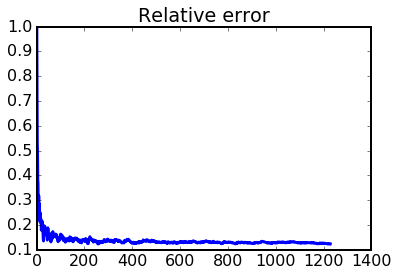

In [98]:
plt.plot((primes-z*np.log(z))/primes)
plt.title("Relative error");

## The Riemann hypothesis

Let's go back to comparing $\pi(n)$ with $\li(n)$ and investigate the error in that approximation:
$$|\li(n) - \pi(n)|$$

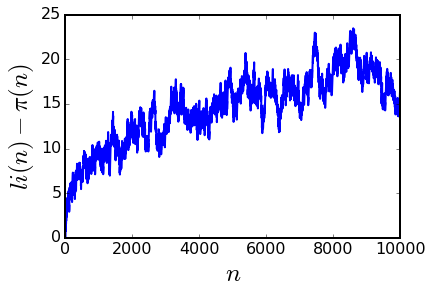

In [103]:
n = 10000
primes = compute_primes(n)
primes_up_to_n = [np.count_nonzero(primes<=i) for i in xrange(1,n+1)]
error = -(primes_up_to_n - np.array([li(x) for x in np.arange(1,n+1)]))
plt.plot(error,lw=2)
plt.hold(True)
x = np.arange(1,n+1)
#plt.plot(np.sqrt(x/np.log(x)),'g')
#plt.plot(np.sqrt(2/np.pi)*np.sqrt(x/np.log(x)),'r');
plt.xlabel('$n$')
plt.ylabel('$li(n)-\pi(n)$');

(discuss Skewes number: http://mathworld.wolfram.com/SkewesNumber.html)

The Riemann hypothesis (in one form) states the claim:

$$|\li(n) - \pi(n)| \le \sqrt{n} \log(n)$$

for all $n>2$.

In [ ]:
plt.plot(error,lw=2)
plt.hold(True)
x = np.arange(1,n+1)
plt.plot(np.sqrt(x*np.log(x)),'g')
#plt.plot(np.sqrt(2/np.pi)*np.sqrt(x/np.log(x)),'r');
plt.xlabel('$n$')
plt.ylabel('$|li(n)-\pi(n)|$');

## Gaps between primes

In [ ]:
n = 100
primes = compute_primes(n)
plt.plot(np.diff(primes));
plt.ylabel('$p_{n+1}-p_n$')
plt.xlabel('$n$');

Gaps of size 2 become more rare, but there still always seem to be more of them, no matter how high we go!  The largest pair of twin primes currently known is

$$3756801695685 \times 2^{666669} \pm 1.$$

These numbers have more than 200000 digits!

The **Twin Prime Conjecture** says that there are infinitely many pairs of twin primes.  Nobody has been able to prove it!  In fact, until recently, we couldn't even prove the following statement:

> There exists some number $k$ such that there are infinitely many pairs of consecutive primes whose difference is equal to $k$.

However, last year Yitang Zhang proved that such a $k$ does exist and that it is no bigger than about 7 million!  Since then, other mathematicians have made this number even smaller, but we still have no proof for $k=2$.

In [ ]:
from sympy import sqrt, simplify
n = 10
g = (5+sqrt(5))/10.*(1./2 + sqrt(5)/2)**n + (5-sqrt(5))/10.*(1./2-sqrt(5)/2)**n

In [ ]:
simplify(g)

In [ ]:
c2 = 1./2-1./(2*sqrt(5))
print c2

In [ ]:
c2 = (5-sqrt(5))/10
print c2

In [ ]:
c1 = 1-c2
print c1

In [ ]:
print (5 +sqrt(5))/10

In [ ]:
alpha1 = 1./2 + sqrt(5)/2
alpha2 = 1./2 - sqrt(5)/2
print alpha1, alpha2

In [ ]:
print c1*alpha1 + c2*alpha2

In [ ]:
print c1+c2

In [ ]:
print alpha1 - alpha2

In [ ]:
print sqrt(5)

In [ ]:
print alpha1 -1
print sqrt(5)/2-1./2